(e_attributes)=
 

----------------

```{admonition} Learning Objectives
* Create and manipulate vector attributes
* Subset data
* Plot lat lon as points
* Subset points by location
```
```{admonition} Review
* [Vector Data](c_vectors.md)
```
----------------


# Attributes & Indexing for Vector Data

```{figure} ../_static/c_data_types/dataframe.svg
:name: vector properties 
Structure of a `GeoDataFrame` extends the functionality of a Pandas `DataFrame`
```

Each `GeoSeries` can contain any geometry type (e.g. points, lines, polygon) and has a `GeoSeries.crs` attribute, which stores information on the projection (CRS stands for Coordinate Reference System). Therefore, each `GeoSeries` in a `GeoDataFrame` can be in a different projection, allowing you to have, for example, multiple versions of the same geometry, just in a different CRS.


```{tip}  Becuase GeoPandas are so intertwined spend the time to learn more about here [Pandas User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)
```

## Create New Attributes

One of the most basic operations is creating new attributes. Let's say for instance we want to look at the world population in millions. We can start with an existing column of data `pop_est`. Let's start by looking at the column names:

In [1]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

We can then do basic operations on the basis of column names. Here we create a new column `m_pop_est`:

In [2]:
world['m_pop_est'] = world['pop_est'] / 1e6
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,m_pop_est
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.889953
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",58.005463


------------------------


## Indexing and Selecting Data

GeoPandas inherits the standard pandas methods for indexing/selecting data. This includes label based indexing with .loc and integer position based indexing with .iloc, which apply to both GeoSeries and GeoDataFrame objects. For more information on indexing/selecting, see the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html).


### Selection by Index Position
 
Pandas provides a suite of methods in order to get purely integer based indexing. The semantics follow closely Python and NumPy slicing. These are 0-based indexing. When slicing, the start bound is included, while the upper bound is excluded.  For instance `name = 'fudge'` with `name[0:3]` returns `'fud'`, where f is at 0 and g is at the 3 position with the upper bound excluded.

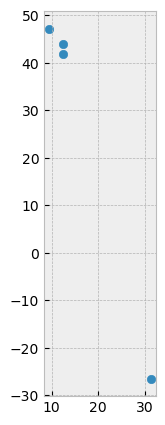

In [3]:
import matplotlib.pyplot as plt
plt.style.use('bmh') # better for plotting geometries vs general plots.

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
northern_world = world.iloc[ 0:4 ]    
northern_world.plot(figsize=(10,5))  
plt.show()

#### Different choices for indexing

Object selection has had a number of user-requested additions in order to
support more explicit location based indexing.  

```{panels}

* ``.loc`` is primarily label based, but may also be used with a boolean array. ``.loc`` will raise ``KeyError`` when the items are not found. Allowed inputs are:

    * A single label, e.g. ``5`` or ``'a'`` (Note that ``5`` is interpreted as a
      *label* of the index. This use is **not** an integer position along the
      index.).
    * A list or array of labels ``['a', 'b', 'c']``.
    * A slice object with labels ``'a':'f'`` (Note that contrary to usual Python
      slices, **both** the start and the stop are included, when present in the
      index! See [Slicing with labels](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-slicing-with-labels) 
      and [Endpoints are inclusive](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-endpoints-are-inclusive) 
    * A boolean array (any ``NA`` values will be treated as ``False``).
    * A ``callable`` function with one argument (the calling Series or DataFrame) and
      that returns valid output for indexing (one of the above).

  See more at [Selection by Label](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label).

------------

* ``.iloc`` is primarily integer position based (from ``0`` to
  ``length-1`` of the axis), but may also be used with a boolean
  array.  ``.iloc`` will raise ``IndexError`` if a requested
  indexer is out-of-bounds, except *slice* indexers which allow
  out-of-bounds indexing.  (this conforms with Python/NumPy *slice*
  semantics).  Allowed inputs are:

    * An integer e.g. ``5``.
    * A list or array of integers ``[4, 3, 0]``.
    * A slice object with integers ``1:7``.
    * A boolean array (any ``NA`` values will be treated as ``False``).
    * A ``callable`` function with one argument (the calling Series or DataFrame) and
      that returns valid output for indexing (one of the above).

  See more at : [Selection by Position](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer) and
  [Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced).

* ``.loc``, ``.iloc``, and also ``[]`` indexing can accept a ``callable`` as indexer. See more at [Selection By Callable](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-callable).

```

Getting values from an object with multi-axes selection uses the following
notation (using ``.loc`` as an example, but the following applies to ``.iloc`` as
well). Any of the axes accessors may be the null slice ``:``. Axes left out of
the specification are assumed to be ``:``, e.g. ``p.loc['a']`` is equivalent to
``p.loc['a', :, :]``.


| Object Type    | Indexers    |
| :--- | ---: |
| Series    | `s.loc[indexer]`   |
| DataFrame    | `df.loc[row_indexer,column_indexer]`   |

### Subset Points by Location
In addition to the standard pandas methods, GeoPandas also provides coordinate based indexing with the cx indexer, which slices using a bounding box. Geometries in the GeoSeries or GeoDataFrame that intersect the bounding box will be returned.

Using the world dataset, we can use this functionality to quickly select all cities in the northern and southern hemisphere using a `_CoordinateIndexer` using `.cx`. `.cx` allows you to quickly access the table's `geometry`, where indexing reflects `[x,y]` or `[lon,lat]`. Here we will query points above and below 0 degrees latitude:

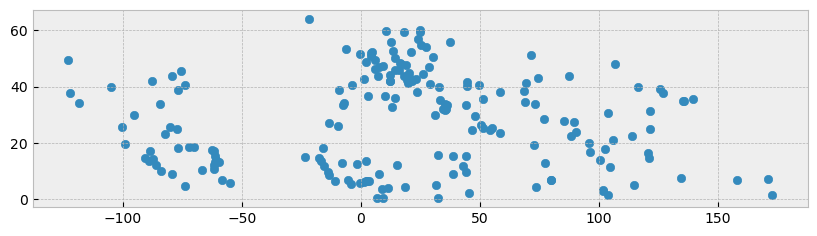

In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
northern_world = world.cx[ : , 0: ]   # subsets all rows above 0 with a slice
northern_world.plot(figsize=(10, 5))
plt.show()

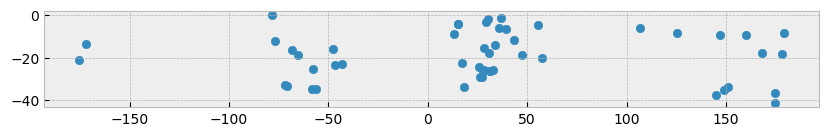

In [5]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
southern_world = world.cx[ : , :0 ]   # subsets all rows below 0  with a slice
southern_world.plot(figsize=(10, 5))
plt.show()